# Esercitazione 6
## Modello di Ising a primi vicini 1d
## Spiegazione programma: Monte_Carlo_ISING_1D.cpp
Le uniche modifiche del programma riguardano:
- la funzione **"Input"**, che legge il file **input.dat** e assegna il valore ad alcune variabili. Tra queste è stata aggiunta la variabile **metro**, che se uguale a 1 il programma fa campionamento di Metropolis, altrimenti quello di Gibbs.
- la funzione **"Move"**, in cui sono stati aggiunti l'algoritmo di Metropolis e di Gibbs. 

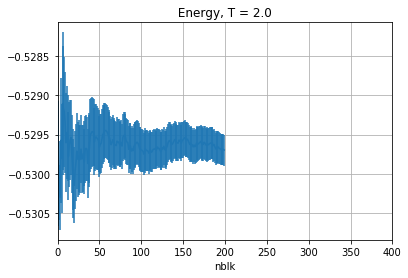

In [28]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

nblk = 200
nstep = 1
nspin = 50

ave = np.zeros(nblk)    
err = np.zeros(nblk)
file_data = np.loadtxt('output.ene.0', usecols=(0,1,2,3))
ave = file_data[:,2]
err = file_data[:,3]

x = np.arange(nblk)
plt.errorbar(x,ave,yerr=err)
#plt.errorbar(x,ave2,yerr=err2)
plt.title(' Energy, T = 2.0 ')
plt.xlabel('nblk')
#plt.legend(['Ekin','Epot','Etot'], loc='best')
#plt.legend(['10'], loc='best')
plt.xlim([0, 400])
#plt.ylim([-0.4620, -0.4635])
plt.grid(True)
#plt.savefig('Pictures/100000_step.png', dpi=300)
plt.show()
#conf iniziale (50,-50,70)

# Grafici di confronto tra Metropolis, Gibbs e  curva esatta
Tutti i risultati sono stati ottenuti con 200 blocchi di lunghezza 5000

# Internal Energy

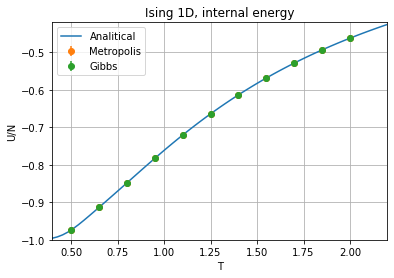

In [32]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
#points=11
#T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

u_metro = [-0.462102,-0.493463,-0.52886,-0.568722,-0.613511,-0.664038,-0.721003,-0.782624,-0.847953,-0.912955,-0.974297]
err_metro = [0.000503709,0.00024904,0.000253625,0.000250923,0.000281715,0.000287235,0.000313967,0.000379723,0.000447439,0.000625334,0.000671814]
u_gibbs = [-0.462078,-0.493346,-0.528526,-0.568453,-0.613568,-0.664447,-0.721204,-0.782729,-0.848125,-0.913661,-0.972972]
err_gibbs = [0.000190422,0.00018905,0.00020162,0.000202359,0.000210575,0.000230833,0.000253329,0.000259465,0.000329931,0.000516566,0.000687557]
Temp = [2.,1.85,1.70,1.55,1.40,1.25,1.10,0.95,0.80,0.65,0.50]

plt.plot(T, e)
plt.errorbar(Temp,u_metro,yerr=err_metro, fmt='o')
plt.errorbar(Temp,u_gibbs,yerr=err_gibbs, fmt='o')
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.xlim([0.40,2.2])
plt.ylim([-1,-0.42])
plt.grid(True)
plt.legend(['Analitical','Metropolis','Gibbs'], loc='best')
plt.show()

Su questa scala i risultati del Metropolis e del Gibbs sono compatibili con la curva esatta e sembrano del tutto equivalenti, allora confrontiamo i valori numerici.  
Temperatura:  $0.5$  
Metropolis: $-0.974297  \pm  0.000671814 $  
Gibbs: $-0.972972  \pm  0.000687557$
Analitica: $-0.9741432356157543$  
Il risultato di "Metropolis" è compatibile in una sigma con il valore vero, quello di "Gibbs" in due sigma.

Temperatura:  $1.25$  
Metropolis: $-0.664038  \pm  0.000287235 $  
Gibbs: $ -0.664447  \pm  0.000230833$
Analitica: $-0.664036771351449$  
Il risultato di "Metropolis" e Gibbs sono compatibili in due sigma con il valore vero.

In [50]:
Tp = 1.25
beta = 1/Tp
J = 1.0
Ns = 50
th = np.tanh(J/Tp)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
print(e)

-0.664036771351449


# Heat Capacity

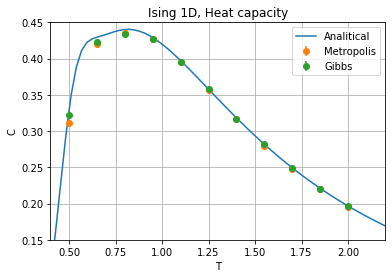

In [45]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

c_metro = [0.194672,0.220556,0.24829,0.279826,0.316744,0.356434,0.395996,0.427386,0.435816,0.419683,0.311503]
err_metro = [0.000842951,0.000424427,0.00050386,0.000625385,0.000741479,0.000935517,0.00127248,0.00153147,0.00213812,0.00351017,0.00560439]
Temp = [2.,1.85,1.70,1.55,1.40,1.25,1.10,0.95,0.80,0.65,0.50]
c_gibbs = [0.196521,0.220667,0.249428,0.281514,0.317262,0.357441,0.395173,0.426434,0.433727,0.42247,0.32242]
err_gibbs = [0.000326412,0.000369886,0.000398249,0.000484507,0.00056649,0.000780676,0.000926461,0.00131964,0.00198325,0.00319377,0.00550858]


plt.plot(T, heat)
plt.errorbar(Temp,c_metro,yerr=err_metro, fmt='o')
plt.errorbar(Temp,c_gibbs,yerr=err_gibbs, fmt='o')
plt.title('Ising 1D, Heat capacity')
plt.legend(['Analitical','Metropolis','Gibbs'], loc='best')
plt.xlabel('T')
plt.ylabel('C')
plt.xlim([0.40,2.2])
plt.ylim([0.15,0.45])
plt.grid(True)
plt.show()

In questo caso i punti da 0.95 a 2.00 si sovrappongono e sono compatibili con la curva analitica, invece da 0.50 a 0.80 ci sono incompatibilità con la curva analitica, analizziamo al meglio con i risultati numerici.

Temperatura:  $0.5$  
Metropolis: $ 0.311503 \pm 0.00560439  $  
Gibbs: $ 0.32242 \pm 0.00550858  $  
Analitica: $ 0.32942793875034226 $  
Il risultato di "Gibbs" è compatibile in due sigma con il valore vero, quello di "Metropolis" in quattro sigma.

Temperatura:  $0.65$  
Metropolis: $ 0.419683   \pm  0.00351017  $  
Gibbs: $ 0.42247  \pm 0.00319377 $  
Analitica: $0.42950994294647143$  
Il risultato di "Gibbs" è compatibile in tre sigma con il valore vero, quello di "Metropolis" in tre sigma.

Temperatura:  $2.00$  
Metropolis: $ 0.194672  \pm 0.000842951  $  
Gibbs: $ 0.196521 \pm 0.000326412  $  
Analitica: $0.19661193324148218$  
Il risultato di "Gibbs" è compatibile in 1 sigma con il valore vero, quello di "Metropolis" in tre sigma.

A parità di lunghezza di run, il Metropolis performa peggio dell'algoritmo di Gibbs nel campionare il calore specifico, in particolare abbassando la temperatura i risultati peggiorano arrivano a distare 4 sigma dal valore vero per T=0.5 .  
Abbassando la Temperatura per il Metropolis, diminuisce l'accettazione e quindi, si esplora una zona dello spazio delle fasi più limitata. Allora per avere dei risultati migliori è necesario aumentare la lunghezza del run.  
Nel caso in questione, non è stato fatto ciò in modo da mettere in evidenza le differenze tra le diverse temperatura. 

In [53]:
T = 2
th = np.tanh(J/T)
beta = 1 / T
thN= th**Ns
ch = 1/th
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
print(heat)

0.19661193324148218


# Magnetic Susceptibility

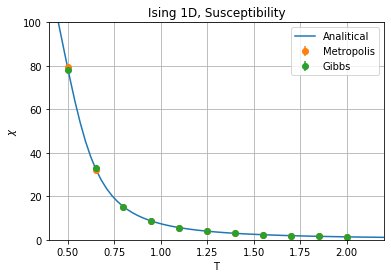

In [47]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

X_metro = [1.36028,1.59273,1.91267,2.34687,2.98636,3.92527,5.56726,8.56991,15.0063,32.2298,79.2675]
err_metro = [0.00970064,0.00525092,0.00711198,0.00917273,0.0134044,0.0197966,0.0363316,0.0654923,0.140627,0.401794,0.651697]
Temp = [2.,1.85,1.70,1.55,1.40,1.25,1.10,0.95,0.80,0.65,0.50]
X_gibbs = [1.3627,1.59494,1.9055,2.34767,2.97476,3.9722,5.60266,8.57401,15.0674,32.9054,78.0345]
err_gibbs = [0.0041249,0.0050978,0.00618733,0.00834575,0.0113663,0.0172358,0.0304603,0.0571627,0.134617,0.37412,0.690626]

plt.plot(T, X)
plt.errorbar(Temp,X_metro,yerr=err_metro, fmt='o')
plt.errorbar(Temp,X_gibbs,yerr=err_gibbs, fmt='o')
plt.legend(['Analitical','Metropolis','Gibbs'], loc='best')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.xlim([0.40,2.2])
plt.ylim([0,100])
plt.grid(True)
plt.show()

Su questa scala, i punti da 0.80 a 2.00 si sovrappongono e sono compatibili con la curva analitica, invece da 0.50 a 0.65 no. Analizziamo al meglio i risultati numerici.

Temperatura:  $0.5$  
Metropolis: $ 79.2675 \pm  0.651697 $  
Gibbs: $ 78.0345 \pm  0.690626 $  
Analitica: $ 79.05207154588918 $  
Il risultato di "Metropolis" è compatibile in un sigma con il valore vero, quello di "Gibbs" in due sigma.

Temperatura:  $0.65$  
Metropolis: $ 32.2298   \pm  0.401794  $  
Gibbs: $ 32.9054  \pm  0.37412 $  
Analitica: $32.71613715281205$  
Il risultato di "Gibbs" è compatibile in un sigma con il valore vero, quello di "Metropolis" in due sigma.

Temperatura:  $2.00$  
Metropolis: $  1.36028 \pm 0.00970064  $  
Gibbs: $ 1.3627 \pm  0.0041249 $  
Analitica: $1.3591409142295225$  
Il risultato di "Metropolis" e "Gibbs" è compatibile in un  sigma con il valore vero.

I risultati ottenuti sono equivalenti tra "Metropolis" e "Gibbs".

In [56]:
T = 2.00

th = np.tanh(J/T)
beta = 1 / T
thN= th**Ns
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
print(X)

1.3591409142295225


# Magnetization

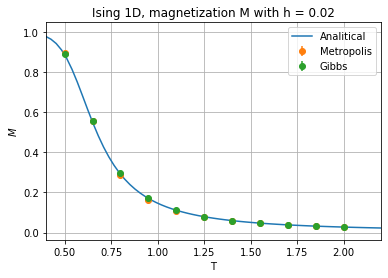

In [48]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

Temp = [2.,1.85,1.70,1.55,1.40,1.25,1.10,0.95,0.80,0.65,0.50]
M_metro = [0.026549,0.0315171,0.0371532,0.0457933,0.0579652,0.0754719,0.107132,0.164062,0.288131,0.557087,0.898513]
err_metro = [0.000732032,0.00079484,0.000932523,0.0010838,0.00136058,0.00163659,0.00233931,0.0035334,0.00580152,0.00930853,0.00975979]
M_gibbs = [0.027134,0.03196,0.0382686,0.0471222,0.059625,0.079039,0.110053,0.17268,0.297256,0.559219,0.892528]
err_gibbs = [0.000664307,0.000707087,0.000826818,0.00103311,0.00129428,0.00159202,0.00225636,0.00324855,0.00484747,0.00883557,0.00979462]


plt.plot(T, M)
plt.errorbar(Temp,M_metro,yerr=err_metro, fmt='o')
plt.errorbar(Temp,M_gibbs,yerr=err_gibbs, fmt='o')
plt.legend(['Analitical','Metropolis','Gibbs'], loc='best')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.xlim([0.40,2.2])
plt.grid(True)
plt.show()

I valori di Metropolis e Gibbs si sovrappongo e giacciono sulla curva analitica su questa scala, allora vediamo da vicino alcuni valori: 
Temperatura:  $0.5$  
Metropolis: $ 0.898513 \pm  0.00975979 $  
Gibbs: $ 0.892528 \pm  0.00979462  $  
Analitica: $ 0.887196317746529 $  
Il risultato di "Metropolis" e "Gibbs" è compatibile in un sigma con il valore vero.

Temperatura:  $0.80$  
Metropolis: $ 0.288131   \pm  0.00580152  $  
Gibbs: $ 0.297256  \pm  0.00484747 $  
Analitica: $0.2912698576126471$  
Il risultato di "Metropolis" è compatibile in un sigma con il valore vero, quello di "Gibbs" in due sigma.

Temperatura:  $2.00$  
Metropolis: $ 0.026549  \pm  0.000732032 $  
Gibbs: $ 0.027134 \pm  0.000664307 $  
Analitica: $0.02717323362574831$  
Il risultato di "Metropolis" e "Gibbs" è compatibile in un  sigma con il valore vero.

In [59]:
T = 0.80
h=0.02 #external field
b = 1/T
th = np.tanh(J/T)
thN= th**Ns

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

print(M)

0.2912698576126471


## Commento finale
Da questi risultati si può affermare che la lunghezza del run non deve essere la stessa per tutte le temperatura, a temperature più basse è opportuno scegliere una lunghezza di run maggiore.  
I risultati tra "Gibbs" e "Metropolis" sono simili, anche se gli errori di Gibbs sono quasi tutti più piccoli. Inoltre, a temperature basse con il calore specifico i risultati di Gibbs sono migliori. Probabilmente questo è dovuto al fatto che nell'algoritmo di Gibbs la mossa è sempre accettata e si riesce a esplorare una maggiore regione dello spazio delle fasi.